In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
X_train = pd.read_csv("train.csv")
y_train = pd.read_csv("train_label.csv", header=None)# Data no incluye primer valor como columna

In [3]:
X_test = pd.read_csv("test.csv")
y_test = pd.read_csv("test_label.csv", header=None) #Data no incluye el primer valor como columna

In [4]:
display(X_train.head(), X_train.shape, y_train.shape)

Unnamed: 0        v0           v1     v2    v3    v4           v5  \
0        1651      0.00    143270.10  100.0   0.0   0.0  63090564.44   
1        1370      0.00   1403461.97   90.0  10.0  29.0   8013913.78   
2        2649  19800.24     63401.41  100.0   0.0   0.0    323384.60   
3         564      0.00  10585032.22  100.0   0.0   5.0  29596681.95   
4        2728      0.00  11259663.09   78.0  22.0   0.0  33626595.71   

           v6       v7         v8  ...  ae61  ae62  ae63  ae64  ae65  ae66  \
0  4199850.00      0.0  6240000.0  ...     0     0     0     0     0     0   
1  8177030.69  44951.9        0.0  ...     0     0     0     0     0     0   
2    67610.22      0.0        0.0  ...     1     0     0     0     0     0   
3   186964.54      0.0  4500000.0  ...     0     0     0     0     0     0   
4        0.00      0.0  3972827.7  ...     0     1     0     0     0     0   

   ae67  ae68  d69  d70  
0     0     0    0    0  
1     0     0    0    0  
2     0     0    1    0  
3     0     0    0    0  
4     0     0    0    0  

[5 rows x 72 columns]

(2189, 72)

(2189, 1)

Entiendo que los valores ya fueron convertidos a OneHotEnconder, y que cada una de las letras representan una variable y el número que lo acompaña representa la categoria de dicha varible

In [5]:
y_train.columns = ["output"]
y_test.columns = ["output"]

In [6]:
y_train.output.value_counts()

0.0    1760
1.0     429
Name: output, dtype: int64

In [7]:
#Corroboramos el porcentaje de imbalance data dentro del dataaset
imbalance = y_train.output.value_counts()
imbalance_result = [x/imbalance.sum()*100 for x in imbalance]
pd.DataFrame(imbalance_result, index=["Pagado a Tiempo", "No Pagado a Tiempo"], columns=["Proporcion (%)"])

Proporcion (%)
Pagado a Tiempo           80.40201
No Pagado a Tiempo        19.59799

In [8]:
#Corroboramos el porcentaje de imbalance data dentro del dataset de testing 
imbalance_test = y_test.output.value_counts()
imbalance_result_test = [x/imbalance.sum()*100 for x in imbalance]
pd.DataFrame(imbalance_result_test, index=["Pagado a Tiempo", "No Pagado a Tiempo"], columns=["Proporcion (%)"])

Proporcion (%)
Pagado a Tiempo           80.40201
No Pagado a Tiempo        19.59799

### Consideracion para imbalanced data.

Ambos modelos (training and testing) estan distribuidos en una proporcion de 80:20, por lo cual debemos considerar que al momento de evaluar accuracy debe ser mayor al 80% (si de realizar el modelo en base al data imbalanced), ya que en el peor de los escenarios el modelo predecira el 80% de las veces bien el testing.

In [9]:
X_train.describe()

Unnamed: 0            v0            v1           v2           v3  \
count  2189.000000  2.189000e+03  2.189000e+03  2189.000000  2189.000000   
mean   1457.217908  2.789336e+04  2.498074e+06    87.098675    10.317953   
std     842.158691  2.770920e+05  3.713769e+06    29.548930    25.922405   
min       0.000000  0.000000e+00  0.000000e+00     0.000000     0.000000   
25%     731.000000  0.000000e+00  1.411988e+04   100.000000     0.000000   
50%    1453.000000  0.000000e+00  1.781006e+05   100.000000     0.000000   
75%    2188.000000  0.000000e+00  3.958601e+06   100.000000     0.000000   
max    2907.000000  5.030246e+06  1.257078e+07   100.000000   100.000000   

                v4            v5            v6            v7            v8  \
count  2189.000000  2.189000e+03  2.189000e+03  2.189000e+03  2.189000e+03   
mean      3.608040  7.332287e+07  1.011043e+07  1.126268e+04  2.283687e+06   
std       8.477891  3.009257e+08  4.209394e+07  1.540442e+05  3.283374e+06   
min       0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%       0.000000  2.898817e+06  0.000000e+00  0.000000e+00  0.000000e+00   
50%       0.000000  1.623024e+07  1.970460e+04  0.000000e+00  0.000000e+00   
75%       5.000000  3.308427e+07  2.560791e+06  0.000000e+00  4.355600e+06   
max     183.000000  3.283312e+09  4.415314e+08  2.427617e+06  1.000000e+07   

       ...         ae61         ae62         ae63         ae64         ae65  \
count  ...  2189.000000  2189.000000  2189.000000  2189.000000  2189.000000   
mean   ...     0.034719     0.371859     0.004111     0.021928     0.004568   
std    ...     0.183109     0.483412     0.064003     0.146481     0.067450   
min    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
50%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
75%    ...     0.000000     1.000000     0.000000     0.000000     0.000000   
max    ...     1.000000     1.000000     1.000000     1.000000     1.000000   

              ae66         ae67         ae68          d69     d70  
count  2189.000000  2189.000000  2189.000000  2189.000000  2189.0  
mean      0.014619     0.007766     0.044312     0.122430     0.0  
std       0.120048     0.087803     0.205835     0.327857     0.0  
min       0.000000     0.000000     0.000000     0.000000     0.0  
25%       0.000000     0.000000     0.000000     0.000000     0.0  
50%       0.000000     0.000000     0.000000     0.000000     0.0  
75%       0.000000     0.000000     0.000000     0.000000     0.0  
max       1.000000     1.000000     1.000000     1.000000     0.0  

[8 rows x 72 columns]

La columna d70 no tiene ningun tipo de valor deberiamos eliminarla del calculo

In [10]:
X_train.drop(labels=['d70'], axis=1, inplace=True)
X_test.drop(labels=['d70'], axis=1, inplace=True)

Consideramos que los primeros 38 columnas (aquellas que tienen como prefijo 'v'),  seran considerados vairables continuas, aunque probablemente la primera columna (Unnamed: 0) sea algun id del dataset, el resto seran datos resultados de categorias.

Para futuras consideraciones sobre un pipeline:
- Para modelos lineales:
* A estos primeros debemos estandarizarlos (v0-v37). Utilizando column_transformer a las varibles con prefijo 'v' 
* Resampling: Oversampling o undersampling (evaluaremos dependiendo del performance del modelo bajo ambos escenarios y elegiremos el que mejor se adecue)
* Utilizare la libreria eli5 para encontrar el "weight" que aporta al modelo en base a LogisticRegression o SVC
* Aplicar RandomizedSearchCV para calibrar los mejores parametros y evaluar mediante confusion_matrix, Classification_report y roc_auc (para evaluar en funcion de gini)
 
Note: Utilizare primero el modelo lineal para tener una referencia por el cual guiarme para hacer los modelos no lineales

-Para otros modelos:
* Utilizar los mismos atributos del modelo para evaluar el feature_importance (particularmente ExtraTree)
* Aplicar RandomizedSearchCV y realizar las evaluaciones metricas.


In [11]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Modelo Lineal

In [12]:
 from sklearn.preprocessing import StandardScaler
 from sklearn.compose import ColumnTransformer

In [13]:
#Datos a ser utilizados para la standarization
col_standard = X_train.iloc[:,0:38].columns.tolist()
print(col_standard)

['Unnamed: 0', 'v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36']


In [14]:
ct = ColumnTransformer([("stand", StandardScaler(), col_standard)], remainder='passthrough')
X_train_stand = pd.DataFrame(ct.fit_transform(X_train), columns=X_train.columns)
X_test_stand = pd.DataFrame(ct.transform(X_test), columns=X_test.columns)
X_train_stand.head()

Unnamed: 0        v0        v1        v2        v3        v4        v5  \
0    0.230154 -0.100688 -0.634219  0.436709 -0.398123 -0.425680 -0.034011   
1   -0.103588 -0.100688 -0.294812  0.098210 -0.012268  2.995764 -0.217076   
2    1.415475 -0.029214 -0.655730  0.436709 -0.398123 -0.425680 -0.242639   
3   -1.060871 -0.100688  2.178058  0.436709 -0.398123  0.164225 -0.145339   
4    1.509303 -0.100688  2.359757 -0.307989  0.450757 -0.425680 -0.131944   

         v6        v7        v8  ...  ae60  ae61  ae62  ae63  ae64  ae65  \
0 -0.140446 -0.073130  1.205229  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1 -0.045941  0.218748 -0.695690  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2 -0.238636 -0.073130 -0.695690  ...   0.0   1.0   0.0   0.0   0.0   0.0   
3 -0.235800 -0.073130  0.675165  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4 -0.240242 -0.073130  0.514570  ...   0.0   0.0   1.0   0.0   0.0   0.0   

   ae66  ae67  ae68  d69  
0   0.0   0.0   0.0  0.0  
1   0.0   0.0   0.0  0.0  
2   0.0   0.0   0.0  1.0  
3   0.0   0.0   0.0  0.0  
4   0.0   0.0   0.0  0.0  

[5 rows x 71 columns]

In [15]:
corr_data = pd.concat([X_train_stand, y_train], axis=1).corr()

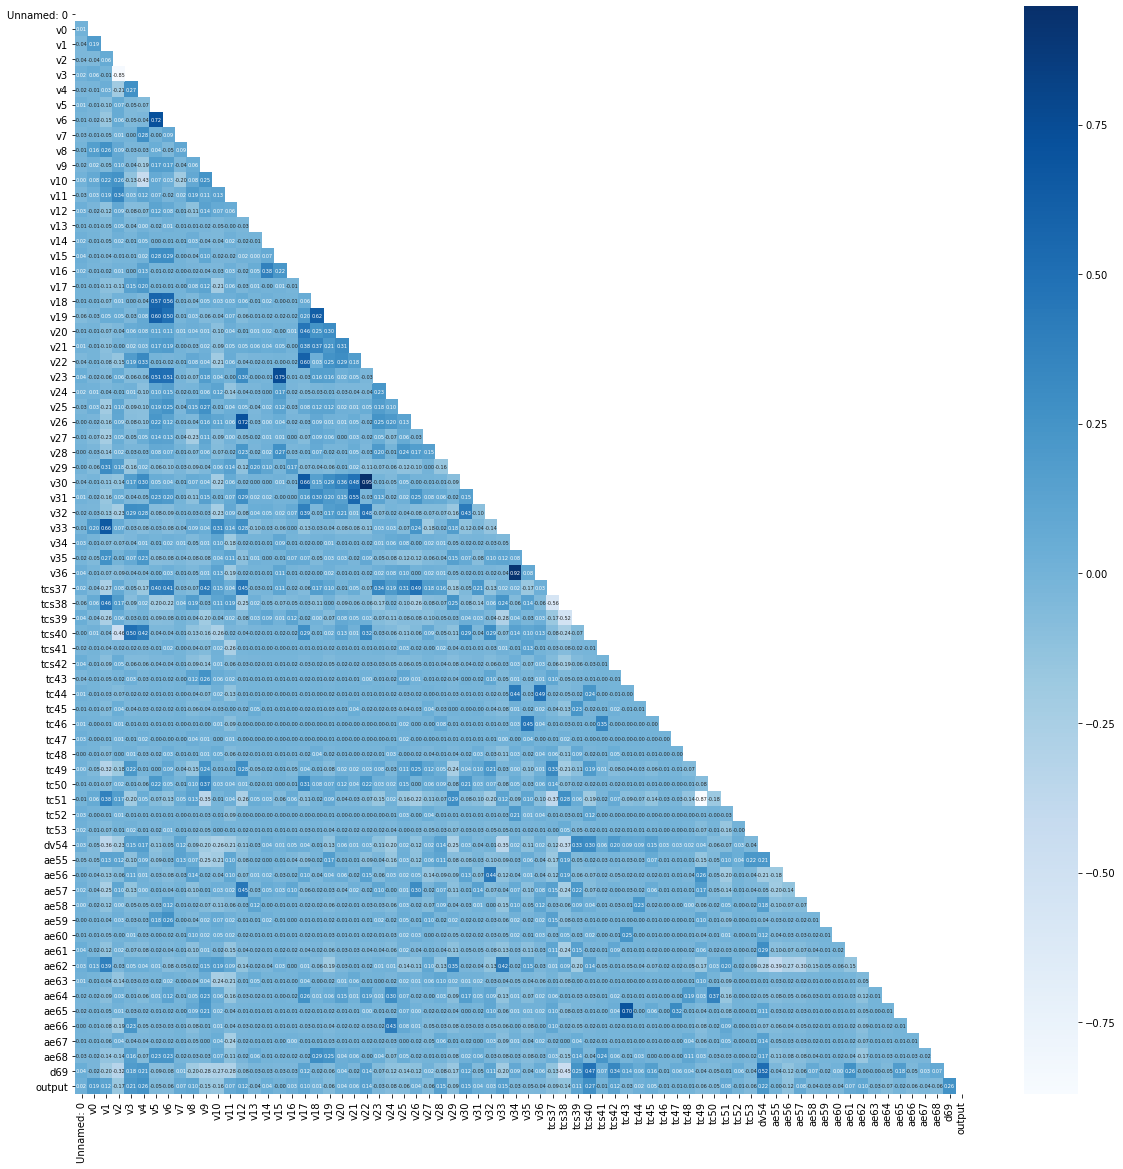

In [16]:
fig, ax = plt.subplots(figsize=(20,20))

mask = np.triu(np.ones_like(corr_data, dtype=np.bool)) #Creamos una mascara para mostrar solo la parte inferior del triangulo
sns.heatmap(corr_data, ax=ax, cmap="Blues", mask=mask, annot=True, annot_kws={"size":5}, fmt=".2f")

De acuerdo a la correlacion V2/V3, V30/V22, V36/v34, tc51/tc49 son mayores al 80%, debemos quedarnos con solo 1 de ellas para evitar colinealidad en el modelamiento del algoritmo


In [17]:
X_train_stand.drop(labels=["v3", "v22", "v36", "tc51" ], axis=1, inplace=True)
X_test_stand.drop(labels=["v3", "v22", "v36", "tc51" ], axis=1, inplace=True)

In [18]:
X_train_stand.shape, X_test_stand.shape

((2189, 67), (548, 67))

Trabajaremos con estas cuatros columnas menos, para evitar colinealidad al momento de evaluar nuestro modelo.

In [19]:
import eli5
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score
lr = LogisticRegression()

In [20]:
params = {
    "penalty": ['none', 'l1', 'l2'],
    "solver": ['lbfgs', 'liblinear'],
}

In [21]:
gs = GridSearchCV(lr, param_grid=params, cv=10, scoring='f1', n_jobs=-1, verbose=2)

### Proceso de Oversampling con SMOTE

In [22]:
sm =SMOTE(sampling_strategy='minority',  random_state=6)
X_train_sm, y_train_sm = sm.fit_resample(X_train_stand, y_train)
y_train_sm['output'].value_counts()

1.0    1760
0.0    1760
Name: output, dtype: int64

In [44]:
def printer_results(model, xtest, ytest):

    print("Confusion matrix: \n {}".format(confusion_matrix(ytest.values.ravel(), model.predict(xtest)))),\
    print(classification_report(ytest.values.ravel(), model.predict(xtest)))

    return {
        "Score": round(model.score(xtest.values, ytest.values.ravel()),2),
        "ROC & AUC Score": round(roc_auc_score(ytest.values.ravel(), model.predict_proba(xtest)[:,1]),2),
        "PR-AUC Score": round(average_precision_score(ytest.values.ravel(), model.predict_proba(xtest)[:,1]),2)
        }

In [45]:
gs.fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['none', 'l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1', verbose=2)

In [47]:
SM_result = printer_results(gs.best_estimator_, X_test_stand, y_test)

Confusion matrix: 
 [[366  74]
 [ 13  95]]
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89       440
         1.0       0.56      0.88      0.69       108

    accuracy                           0.84       548
   macro avg       0.76      0.86      0.79       548
weighted avg       0.89      0.84      0.85       548



In [80]:
explain_sm = eli5.explain_weights(gs.best_estimator_, feature_names=list(X_train_sm.columns), top=(20,5))
feature_sm = eli5.format_as_dataframe(explain_sm)['feature'][:20]
display(explain_sm, feature_sm)

Explanation(estimator="LogisticRegression(penalty='none')", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1.0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='ae65', weight=8.632667979567877, std=None, value=None), FeatureWeight(feature='tcs41', weight=7.83093370024249, std=None, value=None), FeatureWeight(feature='tc44', weight=5.62207056302597, std=None, value=None), FeatureWeight(feature='ae61', weight=3.850327222333511, std=None, value=None), FeatureWeight(feature='ae57', weight=3.7497724654856417, std=None, value=None), FeatureWeight(feature='v18', weight=3.5032999639923754, std=None, value=None), FeatureWeight(feature='tcs42', weight=3.1750709040079705, std=None, value=None), FeatureWeight(feature='tcs38', weight=3.014678675975475, std=None, value=None), FeatureWeight(feature='tcs39', weight=2.837708586127471, std=None, value=None), FeatureWeight(feature='d69', weight=2.4414788569501296, std=None, value=None), FeatureWeight(feature='tcs37', weight=2.4233276770863945, std=None, value=None), FeatureWeight(feature='ae55', weight=2.1804317477696027, std=None, value=None), FeatureWeight(feature='tc48', weight=2.117109547420851, std=None, value=None), FeatureWeight(feature='tcs40', weight=1.987904325288, std=None, value=None), FeatureWeight(feature='v12', weight=1.9643246466258872, std=None, value=None), FeatureWeight(feature='ae62', weight=1.9551773810221627, std=None, value=None), FeatureWeight(feature='v11', weight=1.2577040046322179, std=None, value=None), FeatureWeight(feature='dv54', weight=0.8982970146031015, std=None, value=None), FeatureWeight(feature='v15', weight=0.844018829918333, std=None, value=None), FeatureWeight(feature='v30', weight=0.6234422147395526, std=None, value=None)], neg=[FeatureWeight(feature='v23', weight=-7.415597682432742, std=None, value=None), FeatureWeight(feature='ae60', weight=-6.593771283824754, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=-6.388671771971329, std=None, value=None), FeatureWeight(feature='ae64', weight=-6.255753131776718, std=None, value=None), FeatureWeight(feature='tc53', weight=-5.600828127187213, std=None, value=None)], pos_remaining=16, neg_remaining=25), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

0      ae65
1     tcs41
2      tc44
3      ae61
4      ae57
5       v18
6     tcs42
7     tcs38
8     tcs39
9       d69
10    tcs37
11     ae55
12     tc48
13    tcs40
14      v12
15     ae62
16      v11
17     dv54
18      v15
19      v30
Name: feature, dtype: object

### Proceso de UnderSampling

In [32]:
us =RandomUnderSampler(sampling_strategy='majority', random_state=6)
X_train_us, y_train_us = us.fit_resample(X_train_stand, y_train)
y_train_us['output'].value_counts()

1.0    429
0.0    429
Name: output, dtype: int64

In [65]:
gs.fit(X_train_us, y_train_us)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['none', 'l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1', verbose=2)

In [66]:
US_result = printer_results(gs.best_estimator_, X_test_stand, y_test)

Confusion matrix: 
 [[352  88]
 [ 10  98]]
              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88       440
         1.0       0.53      0.91      0.67       108

    accuracy                           0.82       548
   macro avg       0.75      0.85      0.77       548
weighted avg       0.88      0.82      0.84       548



In [79]:
explain_us = eli5.explain_weights(gs.best_estimator_, feature_names=X_test_stand.columns.tolist(), top=(20,5))
feature_us = eli5.format_as_dataframe(explain_us)['feature'][:20]
display(explain_us, feature_us)

Explanation(estimator="LogisticRegression(penalty='none')", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1.0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='ae65', weight=8.632667979567877, std=None, value=None), FeatureWeight(feature='tcs41', weight=7.83093370024249, std=None, value=None), FeatureWeight(feature='tc44', weight=5.62207056302597, std=None, value=None), FeatureWeight(feature='ae61', weight=3.850327222333511, std=None, value=None), FeatureWeight(feature='ae57', weight=3.7497724654856417, std=None, value=None), FeatureWeight(feature='v18', weight=3.5032999639923754, std=None, value=None), FeatureWeight(feature='tcs42', weight=3.1750709040079705, std=None, value=None), FeatureWeight(feature='tcs38', weight=3.014678675975475, std=None, value=None), FeatureWeight(feature='tcs39', weight=2.837708586127471, std=None, value=None), FeatureWeight(feature='d69', weight=2.4414788569501296, std=None, value=None), FeatureWeight(feature='tcs37', weight=2.4233276770863945, std=None, value=None), FeatureWeight(feature='ae55', weight=2.1804317477696027, std=None, value=None), FeatureWeight(feature='tc48', weight=2.117109547420851, std=None, value=None), FeatureWeight(feature='tcs40', weight=1.987904325288, std=None, value=None), FeatureWeight(feature='v12', weight=1.9643246466258872, std=None, value=None), FeatureWeight(feature='ae62', weight=1.9551773810221627, std=None, value=None), FeatureWeight(feature='v11', weight=1.2577040046322179, std=None, value=None), FeatureWeight(feature='dv54', weight=0.8982970146031015, std=None, value=None), FeatureWeight(feature='v15', weight=0.844018829918333, std=None, value=None), FeatureWeight(feature='v30', weight=0.6234422147395526, std=None, value=None)], neg=[FeatureWeight(feature='v23', weight=-7.415597682432742, std=None, value=None), FeatureWeight(feature='ae60', weight=-6.593771283824754, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=-6.388671771971329, std=None, value=None), FeatureWeight(feature='ae64', weight=-6.255753131776718, std=None, value=None), FeatureWeight(feature='tc53', weight=-5.600828127187213, std=None, value=None)], pos_remaining=16, neg_remaining=25), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

0      ae65
1     tcs41
2      tc44
3      ae61
4      ae57
5       v18
6     tcs42
7     tcs38
8     tcs39
9       d69
10    tcs37
11     ae55
12     tc48
13    tcs40
14      v12
15     ae62
16      v11
17     dv54
18      v15
19      v30
Name: feature, dtype: object

### Proceso con data imbalanced 

In [86]:
gs.fit(X_train_stand, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['none', 'l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1', verbose=2)

In [51]:
imbalanced_result = printer_results(gs.best_estimator_, X_test_stand, y_test)

Confusion matrix: 
 [[414  26]
 [ 35  73]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       440
         1.0       0.74      0.68      0.71       108

    accuracy                           0.89       548
   macro avg       0.83      0.81      0.82       548
weighted avg       0.89      0.89      0.89       548



In [87]:
explanation = eli5.explain_weights(gs.best_estimator_, feature_names=X_test_stand.columns.tolist())
feature_imbalanced = eli5.format_as_dataframe(explanation)
feature_list = feature_imbalanced.feature[:13].tolist()
display(explanation,feature_list) #Top 13'th most valuable features on imbalaned explanation

Explanation(estimator="LogisticRegression(penalty='l1', solver='liblinear')", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1.0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='tc44', weight=2.608179017191151, std=None, value=None), FeatureWeight(feature='ae61', weight=2.2408031692983768, std=None, value=None), FeatureWeight(feature='v12', weight=1.796510877010324, std=None, value=None), FeatureWeight(feature='ae57', weight=1.7559515615884613, std=None, value=None), FeatureWeight(feature='tcs42', weight=1.6780603558009746, std=None, value=None), FeatureWeight(feature='d69', weight=1.0496773384413478, std=None, value=None), FeatureWeight(feature='ae55', weight=1.006589766880721, std=None, value=None), FeatureWeight(feature='ae62', weight=0.9963668857618773, std=None, value=None), FeatureWeight(feature='tcs39', weight=0.8337885724443758, std=None, value=None), FeatureWeight(feature='v11', weight=0.718122630734415, std=None, value=None), FeatureWeight(feature='v1', weight=0.6415124989460447, std=None, value=None), FeatureWeight(feature='dv54', weight=0.5528797689246931, std=None, value=None), FeatureWeight(feature='v28', weight=0.45582659621474503, std=None, value=None), FeatureWeight(feature='v4', weight=0.435015285475806, std=None, value=None)], neg=[FeatureWeight(feature='v23', weight=-5.639378443279851, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=-3.7518828828307123, std=None, value=None), FeatureWeight(feature='ae64', weight=-1.131886001375044, std=None, value=None), FeatureWeight(feature='tc49', weight=-1.023912313499733, std=None, value=None), FeatureWeight(feature='tc53', weight=-0.9043122279689015, std=None, value=None), FeatureWeight(feature='v2', weight=-0.5373009330117108, std=None, value=None)], pos_remaining=13, neg_remaining=20), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

['tc44',
 'ae61',
 'v12',
 'ae57',
 'tcs42',
 'd69',
 'ae55',
 'ae62',
 'tcs39',
 'v11',
 'v1',
 'dv54',
 'v28']

In [61]:
results = pd.DataFrame([SM_result, US_result, imbalanced_result])
results

Score  ROC & AUC Score  PR-AUC Score
0   0.84             0.92          0.70
1   0.82             0.91          0.59
2   0.89             0.93          0.79